[Reference](https://stats.stackexchange.com/questions/345915/trying-to-implement-the-jensen-shannon-divergence-for-multivariate-gaussians)

In [268]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as st
import seaborn as sns

In [271]:
def scipy_jsd(p, q, n_dim=1, n_samples=1000):
    # distance is the square root of this divergence

    X = p.rvs((n_samples, n_dim))
    p_X = p.pdf(X)
    q_X = q.pdf(X)
    log_m_X = np.log2(p_X + q_X).mean()

    Y = q.rvs((n_samples, n_dim))
    p_Y = p.pdf(Y)
    q_Y = q.pdf(Y)
    log_m_Y = np.log2(p_Y + q_Y).mean()
    np.logaddexp
    
    log_p_X = np.log2(p_X).mean()
    log_q_Y = np.log2(q_Y).mean()

    return .5 * (log_p_X - (log_m_X - 1) + log_q_Y - (log_m_Y - 1))

In [272]:
def sklearn_jsd(p, q, n_samples=100):

    X = p.sample(n_samples)
    log_p_X = p.score_samples(X)
    log_q_X = q.score_samples(X)
    log_m_X = np.logaddexp2(log_p_X, log_q_X).mean()

    Y = q.sample(n_samples)
    log_p_Y = p.score_samples(Y)
    log_q_Y = q.score_samples(Y)
    log_m_Y = np.logaddexp2(log_p_Y, log_q_Y).mean()

    return .5 * (log_p_X - (log_m_X - 1) + log_q_Y - (log_m_Y - 1))


  0%|          | 0/10 [00:00<?, ?it/s]

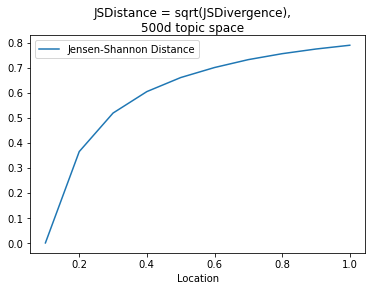

In [275]:

n_topics = 500
n_data = 1000

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from tqdm.auto import tqdm


grid = GridSearchCV(KernelDensity(), {'bandwidth': np.linspace(0.01, 1.0, 11)})

js_dsts = []
for loc in tqdm(np.linspace(0.1,1, 10)):
    p = st.halfnorm(loc=0, scale=[loc] * n_topics)
    q = st.halfnorm(loc=0, scale=[.10] * n_topics)

    # p_data = p.rvs((n_data, n_topics))
    # q_data = p.rvs((n_data, n_topics))
    # p = grid.fit(p_data).best_estimator_
    # q = grid.fit(q_data).best_estimator_
    # js_div = sklearn_jsd(p, q)

    js_div = scipy_jsd(p, q, n_dim=n_topics)
    js_dst = np.sqrt(js_div)
    js_dsts.append(js_dst)

# plot the distances
sns.lineplot(x=np.linspace(0.1,1, 10), y=js_dsts, label='Jensen-Shannon Distance')

plt.xlabel('Location')
plt.suptitle(f'JSDistance = sqrt(JSDivergence),\n'
             f'{n_topics}d topic space')
plt.show()